# A ideia desse projeto é implementar um algoritmo de aprendizado não supervisionado para desenvolver uma segmentação de clientes a partir de estratégias específicas e com clusterização. 

In [1]:
# importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import plotly.express as px

In [2]:
dados = pd.read_csv('/content/drive/MyDrive/Formação - Data Science/Colab Notebooks/python-data-science-aula-1-inicio.zip (Unzipped Files)/Python_Data_Science/Machine Learn/Cluster/Segmentação de Clientes/BancoDeDados.csv', sep = ',')

dados.head()

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,...,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,...,1,credit_card,7,140.61,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,...,1,credit_card,10,137.58,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


# Implementando uma AED

In [3]:
# conhecendo a base de dados
dados.shape

(116581, 27)

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   amostra               116581 non-null  int64  
 1   id_cliente            116581 non-null  object 
 2   id_unico_cliente      116581 non-null  object 
 3   item_id               116581 non-null  int64  
 4   cep_cliente           116581 non-null  int64  
 5   cidade_cliente        116581 non-null  object 
 6   estado_cliente        116581 non-null  object 
 7   id_pedido             116581 non-null  object 
 8   status_pedido         116581 non-null  object 
 9   horario_pedido        116581 non-null  object 
 10  pedido_aprovado       116567 non-null  object 
 11  pedido_entregador     115368 non-null  object 
 12  pedido_entregue       114066 non-null  object 
 13  data_estimada         116581 non-null  object 
 14  id_vendedor           116581 non-null  object 
 15  

In [5]:
coluna = ['pedido_aprovado', 'pedido_entregador', 'pedido_entregue']

for coluna in coluna:
  print(dados[coluna].isna().value_counts())

False    116567
True         14
Name: pedido_aprovado, dtype: int64
False    115368
True       1213
Name: pedido_entregador, dtype: int64
False    114066
True       2515
Name: pedido_entregue, dtype: int64


In [6]:
def plot_perc(var, data):
  plt.figure(figsize= (20, 8))
  g = sns.countplot(x = var, data = data, orient = 'h')
  g.set_ylabel('Contagem', fontsize = 17)

  sizes = []
  for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x() + p.get_width() / 1.5,
           height + 200,
           '{:1.2f}%'.format(height/116581*100),
           ha = 'center', va = 'bottom', fontsize = 12)
    g.set_ylim(0, max(sizes)*1.1)

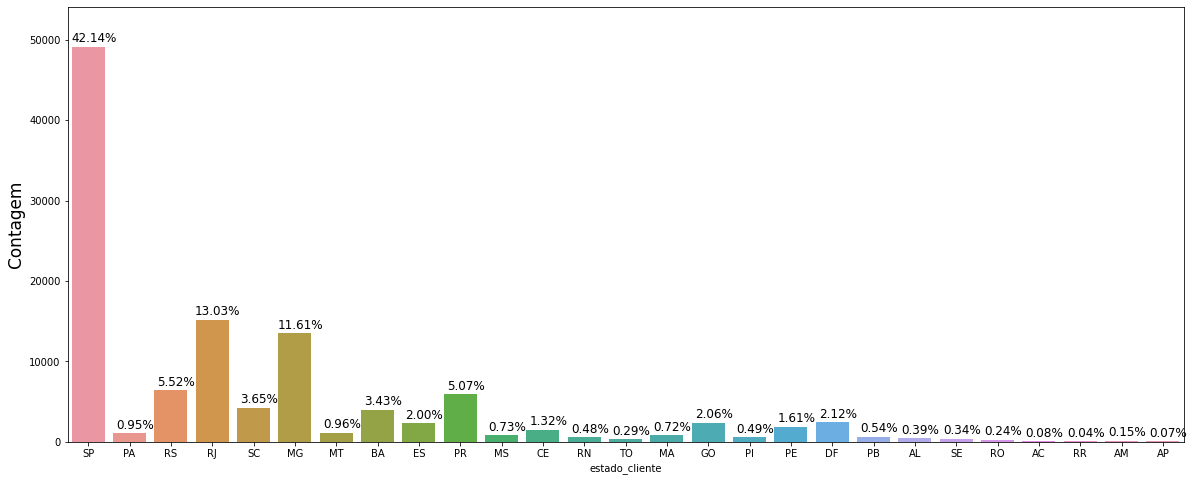

In [7]:
plot_perc('estado_cliente', dados)

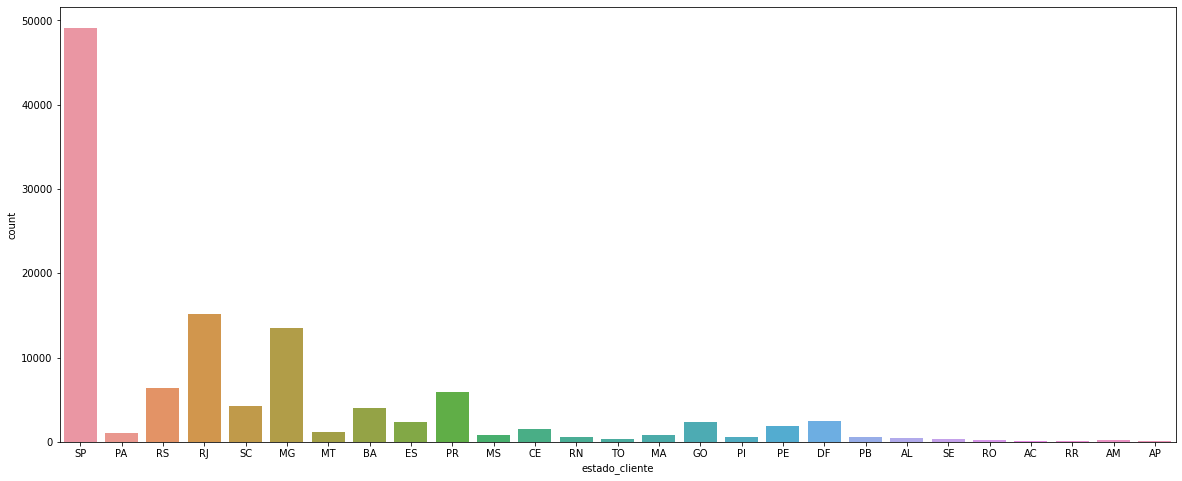

In [8]:
plt.figure(figsize= (20, 8))
gi = sns.countplot(x = 'estado_cliente', data = dados, orient = 'h')

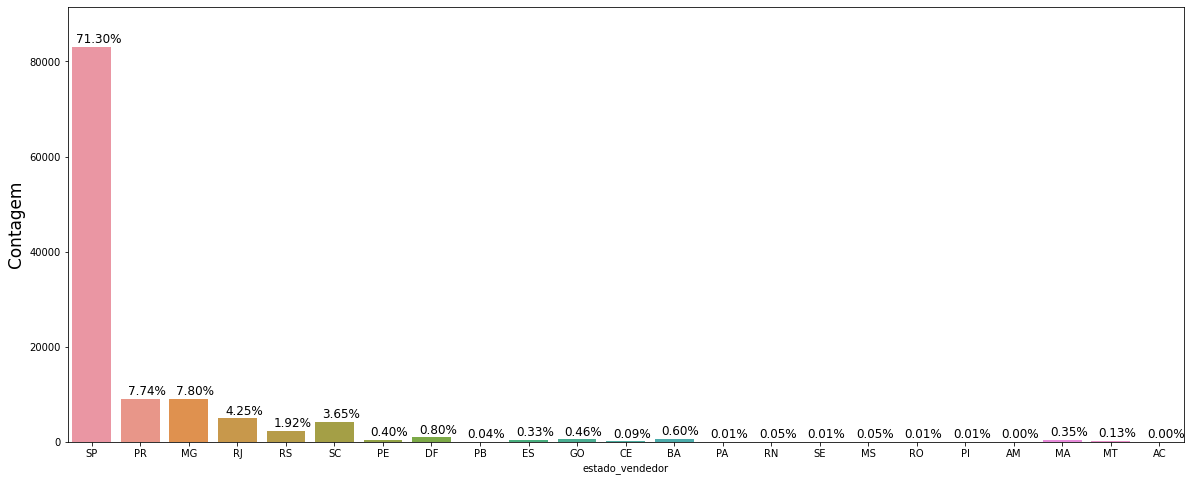

In [9]:
plot_perc('estado_vendedor', dados)

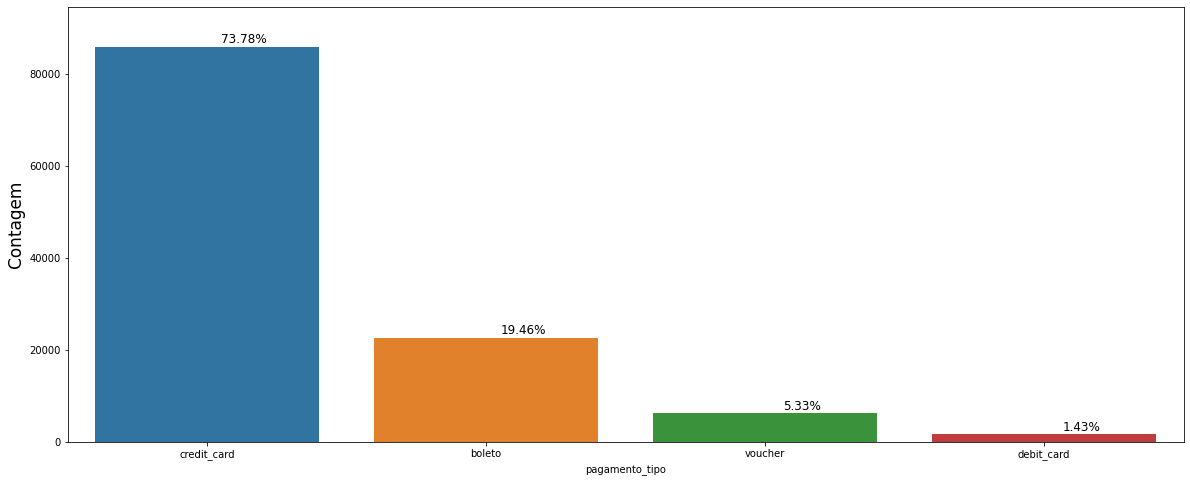

In [10]:
plot_perc('pagamento_tipo', dados)

# Modelo RFM de segmentação de clientes

 - Recência R: Há quantos dias foi a última compra desse cliente?

 - Frequência F: Quantas compras esse cliente já fez na empresa, desde que se cadastrou?

 - Monetaridade M: Quanto esse cliente já gastou em dinheiro na sua empresa?



In [11]:
df_olist = dados[['id_unico_cliente', 'id_cliente', 'horario_pedido', 'item_id', 'preco']]

df_olist.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99


In [12]:
df_compra = dados.groupby('id_unico_cliente').horario_pedido.max().reset_index()
df_compra.columns = ['id_unico_cliente', 'DataMaxCompra']

df_compra['DataMaxCompra'] = pd.to_datetime(df_compra['DataMaxCompra'])

df_compra.head()

,id_unico_cliente,DataMaxCompra
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


In [13]:
df_compra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94087 entries, 0 to 94086
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_unico_cliente  94087 non-null  object        
 1   DataMaxCompra     94087 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 1.4+ MB


In [14]:
df_compra['Recencia'] = (df_compra['DataMaxCompra'].max() - df_compra['DataMaxCompra']).dt.days
df_compra.head()

,id_unico_cliente,DataMaxCompra,Recencia
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292


In [15]:
df_usuario = pd.merge(df_olist, df_compra[['id_unico_cliente', 'Recencia']], on = 'id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211


In [16]:
def calcular_wcss(data):
  wcss = []
  for k in range(1, 10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X = data)
    data['Clusters'] = kmeans.labels_
    wcss.append(kmeans.inertia_)
  return wcss

In [17]:
from sklearn.cluster import KMeans
df_recencia = df_usuario[['Recencia']]
df_recencia.shape 

(116581, 1)

In [ ]:
soma_quadrados = calcular_wcss(df_recencia)

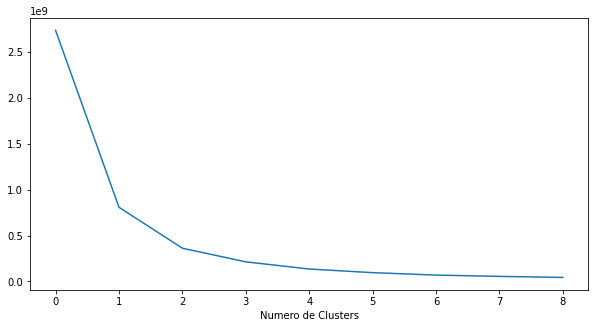

In [19]:
plt.figure(figsize = (10, 5))
plt.plot(soma_quadrados)
plt.xlabel('Numero de Clusters')
plt.show()

In [20]:
import math
def numero_otimo_clusters(wcss):
  x1, y1 = 2, wcss[0]
# pensar em abordagem diferente pra achar o número de clusters

In [21]:
# aplicando a clusterização 

kmeans = KMeans(n_clusters = 4)
df_usuario['Recencia_clusters'] = kmeans.fit_predict(df_recencia)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,Recencia_clusters
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,1
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,2
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,2
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,1
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,0


In [22]:
agrupado_por_cluster = df_usuario.groupby('Recencia_clusters')['Recencia'].mean().round().reset_index()

agrupado_por_cluster

,Recencia_clusters,Recencia
0,0,187.0
1,1,489.0
2,2,319.0
3,3,66.0


In [23]:
agrupado_por_cluster_ordenado = agrupado_por_cluster.sort_values(by = 'Recencia', ascending = False).reset_index(drop = True)
agrupado_por_cluster_ordenado

,Recencia_clusters,Recencia
0,1,489.0
1,2,319.0
2,0,187.0
3,3,66.0


In [24]:
agrupado_por_cluster_ordenado['index'] = agrupado_por_cluster_ordenado.index
agrupado_por_cluster_ordenado

,Recencia_clusters,Recencia,index
0,1,489.0,0
1,2,319.0,1
2,0,187.0,2
3,3,66.0,3


In [25]:
juntando_cluster = pd.merge(df_usuario, agrupado_por_cluster_ordenado[['Recencia_clusters', 'index']], on = 'Recencia_clusters')
juntando_cluster.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,Recencia_clusters,index
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,1,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,1,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,1,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,1,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,1,0


In [26]:
removendo_dados = juntando_cluster.drop(['Recencia_clusters'], axis = 1)
removendo_dados.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,index
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0


In [27]:
df_final = removendo_dados.rename(columns = {'index': 'Recencia_cluster'})
df_final.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,Recencia_cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0


In [28]:
def ordenador_cluster(cluster_nome, target_nome, df):
  agrupado_por_cluster = df.groupby(cluster_nome)[target_nome].mean().round().reset_index()
  agrupado_por_cluster_ordenado = agrupado_por_cluster.sort_values(by = target_nome, ascending = True).reset_index(drop = True)
  agrupado_por_cluster_ordenado['index'] = agrupado_por_cluster_ordenado.index
  juntando_cluster = pd.merge(df, agrupado_por_cluster_ordenado[[cluster_nome, 'index']], on = cluster_nome)
  removendo_dados = juntando_cluster.drop([cluster_nome], axis = 1)
  df_final = removendo_dados.rename(columns = {'index': cluster_nome})
  return df_final

In [29]:
df_usuario = ordenador_cluster('Recencia_clusters', 'Recencia', df_usuario)

In [30]:
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,Recencia_clusters
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,3
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,3
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,3


In [31]:
df_usuario.groupby('Recencia_clusters')['Recencia'].describe()

,count,mean,std,min,25%,50%,75%,max
Recencia_clusters,,,,,,,,
0,31588.0,66.405850,35.800016,0.0,33.0,67.0,99.0,126.0
1,33601.0,187.076277,35.024122,127.0,157.0,187.0,217.0,252.0
2,30695.0,318.687376,43.450070,253.0,281.0,312.0,355.0,403.0
3,20697.0,489.070832,59.862148,404.0,441.0,480.0,532.0,728.0


In [32]:
df_frequencia = dados.groupby('id_unico_cliente')['pedido_aprovado'].count().reset_index()
df_frequencia.columns = ['id_unico_cliente', 'Frequencia']
df_frequencia.head()

,id_unico_cliente,Frequencia
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [33]:
df_usuario = pd.merge(df_usuario, df_frequencia, on = 'id_unico_cliente')

df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,Recencia_clusters,Frequencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3,1
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3,1
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,3,1
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,3,1
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,3,1


In [34]:
df_frequencia = df_usuario[['Frequencia']]
kmeans = KMeans(n_clusters=4)
df_usuario['Frequencia_clusters'] = kmeans.fit_predict(df_frequencia)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,Recencia_clusters,Frequencia,Frequencia_clusters
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3,1,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3,1,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,3,1,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,3,1,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,3,1,0


In [35]:
df_usuario.groupby('Frequencia_clusters')['Frequencia'].count().reset_index()

,Frequencia_clusters,Frequencia
0,0,106570
1,1,75
2,2,731
3,3,9205


In [36]:
df_usuario = ordenador_cluster('Frequencia_clusters', 'Frequencia', df_usuario)
df_usuario.groupby('Frequencia_clusters')['Frequencia'].count().reset_index()

,Frequencia_clusters,Frequencia
0,0,106570
1,1,9205
2,2,731
3,3,75


In [37]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   amostra               116581 non-null  int64  
 1   id_cliente            116581 non-null  object 
 2   id_unico_cliente      116581 non-null  object 
 3   item_id               116581 non-null  int64  
 4   cep_cliente           116581 non-null  int64  
 5   cidade_cliente        116581 non-null  object 
 6   estado_cliente        116581 non-null  object 
 7   id_pedido             116581 non-null  object 
 8   status_pedido         116581 non-null  object 
 9   horario_pedido        116581 non-null  object 
 10  pedido_aprovado       116567 non-null  object 
 11  pedido_entregador     115368 non-null  object 
 12  pedido_entregue       114066 non-null  object 
 13  data_estimada         116581 non-null  object 
 14  id_vendedor           116581 non-null  object 
 15  

In [38]:
df_receita = dados.groupby('id_unico_cliente')['pagamento_valor'].sum().reset_index()
df_receita.columns =['id_unico_cliente', 'Receita']

In [39]:
df_usuario = pd.merge(df_usuario, df_receita, on = 'id_unico_cliente')

In [40]:
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,Recencia_clusters,Frequencia,Frequencia_clusters,Receita
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3,1,0,146.87
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3,1,0,140.61
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,3,1,0,142.05
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,3,1,0,155.70
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,3,1,0,148.33


In [41]:
df_pagamento = df_usuario[['Receita']]
kmeans = KMeans(n_clusters = 4)
df_usuario['Receita_clusters'] = kmeans.fit_predict(df_pagamento)

In [42]:
df_usuario = ordenador_cluster('Receita_clusters', 'Receita', df_usuario)

In [43]:
df_usuario.groupby('Receita_clusters')['Receita'].describe()

,count,mean,std,min,25%,50%,75%,max
Receita_clusters,,,,,,,,
0,114709.0,256.843780,360.390633,9.59,69.85,132.49,268.77,2869.25
1,1665.0,5510.153423,2784.346269,2889.60,3472.96,4345.50,6718.39,14963.64
2,199.0,26914.634523,10065.864450,16313.60,19167.26,22346.60,30186.00,45256.00
3,8.0,109312.640000,0.000000,109312.64,109312.64,109312.64,109312.64,109312.64


In [44]:
df_usuario.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116581 entries, 0 to 116580
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_unico_cliente     116581 non-null  object 
 1   id_cliente           116581 non-null  object 
 2   horario_pedido       116581 non-null  object 
 3   item_id              116581 non-null  int64  
 4   preco                116581 non-null  float64
 5   Recencia             116581 non-null  int64  
 6   Recencia_clusters    116581 non-null  int64  
 7   Frequencia           116581 non-null  int64  
 8   Frequencia_clusters  116581 non-null  int64  
 9   Receita              116581 non-null  float64
 10  Receita_clusters     116581 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 10.7+ MB


In [45]:
df_final = df_usuario[['id_unico_cliente', 'Recencia', 'Recencia_clusters', 'Frequencia', 'Frequencia_clusters',
                       'Receita', 'Receita_clusters']]
df_final.info()                      

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116581 entries, 0 to 116580
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_unico_cliente     116581 non-null  object 
 1   Recencia             116581 non-null  int64  
 2   Recencia_clusters    116581 non-null  int64  
 3   Frequencia           116581 non-null  int64  
 4   Frequencia_clusters  116581 non-null  int64  
 5   Receita              116581 non-null  float64
 6   Receita_clusters     116581 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 7.1+ MB


In [46]:
import sys
import warnings

if not sys.warnoptions:
  warnings.simplefilter('ignore')

df_final['pontuação'] = df_usuario['Recencia_clusters'] + df_usuario['Frequencia_clusters'] + df_usuario['Receita_clusters']
df_final.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,id_unico_cliente,Recencia,Recencia_clusters,Frequencia,Frequencia_clusters,Receita,Receita_clusters,pontuação
0,861eff4711a542e4b93843c6dd7febb0,474,3,1,0,146.87,0,3
1,3c799d181c34d51f6d44bbbc563024db,483,3,1,0,140.61,0,3
2,567ab47ca4deb92d46dbf54dce07d0a7,528,3,1,0,142.05,0,3
3,f40ab89b622248b7ca125af4b486b887,474,3,1,0,155.70,0,3
4,749943913a9851a39c9baf51877fbab6,533,3,1,0,148.33,0,3


In [47]:
df_final['pontuação'].max()

6

In [48]:
df_final['segmento'] = 'inativo'
df_final.loc[df_final['pontuação'] >= 1, 'segmento'] = 'Business'
df_final.loc[df_final['pontuação'] >= 3, 'segmento'] = 'Master'
df_final.loc[df_final['pontuação'] >= 5, 'segmento'] = 'Premium'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [49]:
df_final.segmento.value_counts()

Business    63453
inativo     28961
Master      23579
Premium       588
Name: segmento, dtype: int64

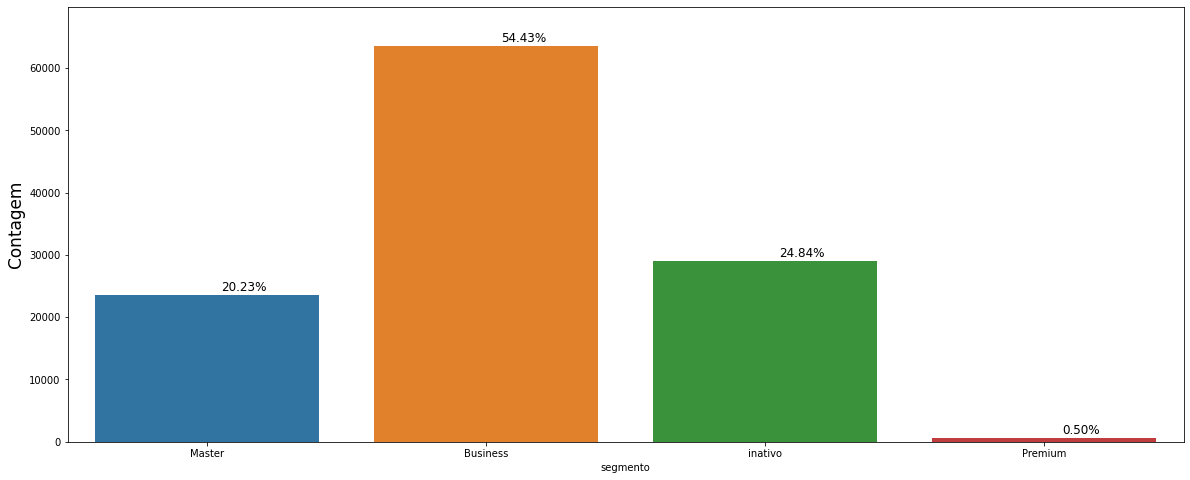

In [50]:
plot_perc('segmento', df_final)

In [51]:
df_final.to_csv('RFM.csv', index = False)

In [52]:
def plot_segmento(x,y,data):
    sns.set(palette='muted', color_codes=True, style='whitegrid')
    fig, axs = plt.subplots(1, 1, figsize=(7, 5))
    sns.despine(left=True)
    sns.scatterplot(x=x, y=y, hue='segmento', data=data, size='segmento', sizes=(50,150), size_order=['Premium','Master','Business','inativo'])
    axs.set_title('Segmento de Cliente')
    plt.show()

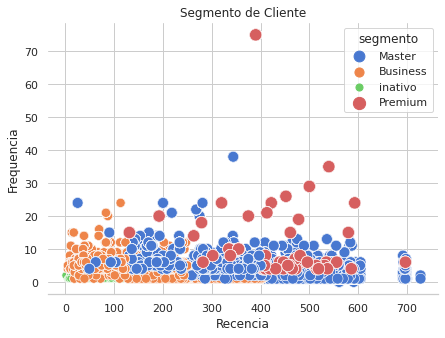

In [53]:
plot_segmento('Recencia','Frequencia',df_final)

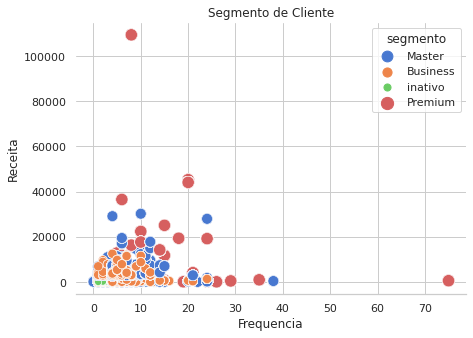

In [54]:
plot_segmento('Frequencia', 'Receita', df_final)

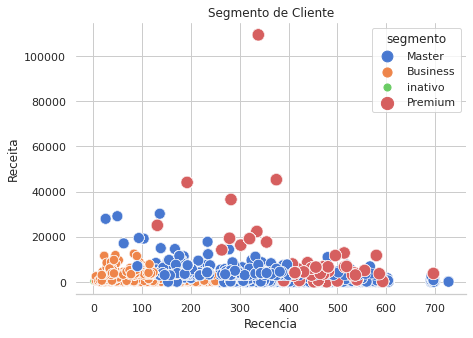

In [55]:
plot_segmento('Recencia', 'Receita', df_final)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


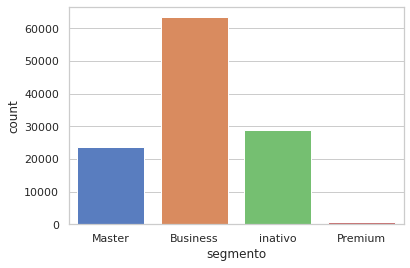

In [56]:
sns.countplot(df_final['segmento'])
plt.show()

# Após aplicar a segmentação na nossa base de dados da empresa, agora buscaremos definir quais a melhores abordagens para condicionar um melhor desempenho por parte dos clientes em suas compras a partir de enfoques específicos na experiência do usuário. Temos as seguintes estratégias:

# 1 - Foco na satisfação do cliente:
 - A ênfase deve ser colocada em manter os clientes satisfeitos, oferecendo a eles uma experiência positiva toda vez que interagem com os negócios.

# 2 - Tornar as interassões pessoais:
 - Devido a dificuldade dos usuários em associar as empresas à construção de conexões e relacionamentos, é necessário fazer com que se sintam desejados.

# 3 - Construir uma comunidade:
 - Se a empresa possui um negócio tradicional, considere a realização de eventos que agrupem indivíduos com ideias semelhantes na área.

 # 4 - Ofereça recompensas instantâneas sem amarras:
  - Certificar de obter algum tipo de informação de contato do cliente. Evitar enviá-los por spam e enviar conteúdo irrelevante à sua maneira, no entanto, não ter vergonha de envolvé-los novamente.

# 5 - Programa de fidelidade 

# 6 - Programa vip

# 7 - Aumentar o envolvimento nas mídias sociais